In [2]:
# setup
import io
import base64
import sys
sys.path.append('/u/nrahman/workspace/nada/branches/pynada/')
%matplotlib inline
#%matplotlib notebook
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1.axes_divider import make_axes_locatable
import matplotlib as mpl
import numpy as np
import h5py
import scipy as sp
import pandas as pd
import sklearn as sk 

%load_ext autoreload
%autoreload 2

from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

mpl.rcParams['text.usetex'] = 'True'
mpl.rcParams['axes.grid'] = False
mpl.rcParams['xtick.top'] = True
mpl.rcParams['xtick.bottom'] = True
mpl.rcParams['ytick.left'] = True
mpl.rcParams['ytick.right'] = True
mpl.rcParams['xtick.minor.visible'] = True
mpl.rcParams['ytick.minor.visible'] = True
mpl.rcParams['xtick.direction'] = 'in'
mpl.rcParams['ytick.direction'] = 'in'
mpl.rcParams['xtick.major.size'] = 14
mpl.rcParams['ytick.major.size'] = 14
mpl.rcParams['xtick.minor.size'] = 7
mpl.rcParams['ytick.minor.size'] = 7
mpl.rcParams['xtick.major.width'] = 2
mpl.rcParams['ytick.major.width'] = 2
mpl.rcParams['xtick.minor.width'] = 1.2
mpl.rcParams['ytick.minor.width'] = 1.2
mpl.rcParams['axes.labelsize'] = 30
mpl.rcParams['xtick.labelsize'] = 30
mpl.rcParams['ytick.labelsize'] = 30
mpl.rcParams['legend.loc'] = 'best'
mpl.rcParams['legend.fontsize'] = 20
mpl.rcParams['lines.linewidth'] = 4
mpl.rcParams['pdf.fonttype'] = 42
mpl.rcParams['font.serif'] = 'Computer Modern'

blue = '#1f77b4'
orange = '#ff7f0e'
green = '#2ca02c'
red = '#ad494a'
violet = '#9467bd'
brown = '#8c564b'

In [10]:
# import
# import scikit_posthocs as sp
import numpy as np
from scipy import stats
import pandas as pd
pd.options.display.float_format = '{:,.4f}'.format

In [14]:
# functions
def check_normality(data):
    test_stat_normality, p_value_normality=stats.shapiro(data)
    print("p value:%.4f" % p_value_normality)
    if p_value_normality <0.05:
        print("Reject null hypothesis >> The data is not normally distributed")
    else:
        print("Fail to reject null hypothesis >> The data is normally distributed")
        
def check_variance_homogeneity(group1, group2):
    test_stat_var, p_value_var= stats.levene(group1,group2)
    print("p value:%.4f" % p_value_var)
    if p_value_var <0.05:
        print("Reject null hypothesis >> The variances of the samples are different.")
    else:
        print("Fail to reject null hypothesis >> The variances of the samples are same.")

In [16]:
# test 1
from scipy import stats
sync = np.array([94. , 84.9, 82.6, 69.5, 80.1, 79.6, 81.4, 77.8, 81.7, 78.8, 73.2,
       87.9, 87.9, 93.5, 82.3, 79.3, 78.3, 71.6, 88.6, 74.6, 74.1, 80.6])
asyncr =np.array([77.1, 71.7, 91. , 72.2, 74.8, 85.1, 67.6, 69.9, 75.3, 71.7, 65.7, 72.6, 71.5, 78.2])

check_normality(sync)
check_normality(asyncr)

check_variance_homogeneity(sync, asyncr)

ttest, p_value = stats.ttest_ind(sync, asyncr)
print("p value:%.8f" % p_value)
print("since the hypothesis is one sided >> use p_value/2 >> p_value_one_sided:%.4f" %(p_value/2))
if p_value/2 <0.05:
    print("Reject null hypothesis")
else:
    print("Fail to reject null hypothesis") 

p value:0.6556
Fail to reject null hypothesis >> The data is normally distributed
p value:0.0803
Fail to reject null hypothesis >> The data is normally distributed
p value:0.8149
Fail to reject null hypothesis >> The variances of the samples are same.
p value:0.00753598
since the hypothesis is one sided >> use p_value/2 >> p_value_one_sided:0.0038
Reject null hypothesis


In [29]:
# test-2
only_breast=np.array([794.1, 716.9, 993. , 724.7, 760.9, 908.2, 659.3 , 690.8, 768.7,
       717.3 , 630.7, 729.5, 714.1, 810.3, 583.5, 679.9, 865.1])

only_formula=np.array([ 898.8,  881.2,  940.2,  966.2,  957.5, 1061.7, 1046.2,  980.4,
        895.6,  919.7, 1074.1,  952.5,  796.3,  859.6,  871.1 , 1047.5,
        919.1 , 1160.5,  996.9])

both=np.array([976.4, 656.4, 861.2, 706.8, 718.5, 717.1, 759.8, 894.6, 867.6,
       805.6, 765.4, 800.3, 789.9, 875.3, 740. , 799.4, 790.3, 795.2 ,
       823.6, 818.7, 926.8, 791.7, 948.3])

check_normality(only_breast)
check_normality(only_formula)
check_normality(both)

stat, pvalue_levene= stats.levene(only_breast,only_formula,both)

print("p value:%.4f" % pvalue_levene)
if pvalue_levene <0.05:
    print("Reject null hypothesis >> The variances of the samples are different.")
else:
    print("Fail to reject null hypothesis >> The variances of the samples are same.")
    
F, p_value = stats.f_oneway(only_breast,only_formula,both)
print("p value:%.6f" % p_value)
if p_value <0.05:
    print("Reject null hypothesis")
else:
    print("Fail to reject null hypothesis")
    

ttest, p_value = stats.ttest_ind(only_breast, both)
print("p value:%.8f" % p_value)
ttest, p_value = stats.ttest_ind(only_breast, only_formula)
print("p value:%.8f" % p_value)
ttest, p_value = stats.ttest_ind(only_formula, both)
print("p value:%.8f" % p_value)

p value:0.4694
Fail to reject null hypothesis >> The data is normally distributed
p value:0.8879
Fail to reject null hypothesis >> The data is normally distributed
p value:0.7973
Fail to reject null hypothesis >> The data is normally distributed
p value:0.7673
Fail to reject null hypothesis >> The variances of the samples are same.
p value:0.000000
Reject null hypothesis
p value:0.04315143
p value:0.00000016
p value:0.00000117


In [31]:
# test-3
test_team=np.array([6.2,  7.1,  1.5,  2,3 ,  2,  1.5,  6.1,  2.4,  2.3, 12.4,  1.8,  5.3,  3.1, 9.4,  2.3, 4.1])
developer_team=np.array([2.3,  2.1,  1.4,  2.0, 8.7,  2.2,  3.1,  4.2,  3.6, 2.5,  3.1,  6.2, 12.1,  3.9,  2.2, 1.2 ,3.4])

check_normality(test_team)
check_normality(developer_team)

check_variance_homogeneity(test_team, developer_team)

ttest,pvalue = stats.mannwhitneyu(test_team,developer_team, alternative="two-sided")
print("p-value:%.4f" % pvalue)
if pvalue <0.05:
    print("Reject null hypothesis")
else:
    print("Fail to recejt null hypothesis")

p value:0.0046
Reject null hypothesis >> The data is not normally distributed
p value:0.0005
Reject null hypothesis >> The data is not normally distributed
p value:0.5410
Fail to reject null hypothesis >> The variances of the samples are same.
p-value:0.8226
Fail to recejt null hypothesis


In [34]:
# test-4
youtube=np.array([1913, 1879, 1939, 2146, 2040, 2127, 2122, 2156, 2036, 1974, 1956,
       2146, 2151, 1943, 2125])
       
instagram =  np.array([2305., 2355., 2203., 2231., 2185., 2420., 2386., 2410., 2340.,
       2349., 2241., 2396., 2244., 2267., 2281.])
       
facebook = np.array([2133., 2522., 2124., 2551., 2293., 2367., 2460., 2311., 2178.,
       2113., 2048., 2443., 2265., 2095., 2528.]) 

check_normality(youtube)
check_normality(instagram)
check_normality(facebook)

stat, pvalue_levene= stats.levene(youtube,instagram,facebook)

print("p value:%.4f" % pvalue_levene)
if pvalue_levene <0.05:
    print("Reject null hypothesis >> The variances of the samples are different.")
else:
    print("Fail to reject null hypothesis >> The variances of the samples are same.")

F, p_value = stats.kruskal(youtube, instagram, facebook)
print("p value:%.6f" % p_value)
if p_value <0.05:
    print("Reject null hypothesis")
else:
    print("Fail to reject null hypothesis")

p value:0.0285
Reject null hypothesis >> The data is not normally distributed
p value:0.4156
Fail to reject null hypothesis >> The data is normally distributed
p value:0.1716
Fail to reject null hypothesis >> The data is normally distributed
p value:0.0012
Reject null hypothesis >> The variances of the samples are different.
p value:0.000015
Reject null hypothesis


In [46]:
# test-5
test_results_before_diet=np.array([224, 235, 223, 253, 253, 224, 244, 225, 259, 220, 242, 240, 239, 229, 276, 254, 237, 227])
test_results_after_diet=np.array([198, 195, 213, 190, 246, 206, 225, 199, 214, 210, 188, 205, 200, 220, 190, 199, 191, 218])

check_normality(test_results_before_diet)
check_normality(test_results_after_diet)

test_stat, p_value_paired = stats.ttest_rel(test_results_before_diet, test_results_after_diet)
print("p value:%.6f" % p_value_paired , "one tailed p value:%.6f" %(p_value_paired/2))
if p_value_paired <0.05:
    print("Reject null hypothesis")
else:
    print("Fail to reject null hypothesis")

p value:0.1635
Fail to reject null hypothesis >> The data is normally distributed
p value:0.1003
Fail to reject null hypothesis >> The data is normally distributed
p value:0.000008 one tailed p value:0.000004
Reject null hypothesis


In [38]:
# test-6
piedpiper=np.array([4.57, 4.55, 5.47, 4.67, 5.41, 5.55, 5.53, 5.63, 3.86, 3.97, 5.44, 3.93, 5.31, 5.17, 4.39, 4.28, 5.25])
endframe = np.array([4.27, 3.93, 4.01, 4.07, 3.87, 4.  , 4.  , 3.72, 4.16, 4.1 , 3.9 , 3.97, 4.08, 3.96, 3.96, 3.77, 4.09])

check_normality(piedpiper)
check_normality(endframe)

stat, pvalue_levene= stats.levene(piedpiper,endframe)

print("p value:%.4f" % pvalue_levene)
if pvalue_levene <0.05:
    print("Reject null hypothesis >> The variances of the samples are different.")
else:
    print("Fail to reject null hypothesis >> The variances of the samples are same.")
    
test,pvalue = stats.wilcoxon(endframe, piedpiper) ##alternative default two sided
print("p-value:%.6f" %pvalue, ">> one_tailed_pval:%.6f" %(pvalue/2))

test,one_sided_pvalue = stats.wilcoxon(endframe, piedpiper, alternative="less")
print("one sided pvalue:%.6f" %(one_sided_pvalue))
if pvalue < 0.05:
    print("Reject null hypothesis")
else:
    print("Fail to recejt null hypothesis")

p value:0.0304
Reject null hypothesis >> The data is not normally distributed
p value:0.9587
Fail to reject null hypothesis >> The data is normally distributed
p value:0.0001
Reject null hypothesis >> The variances of the samples are different.
p-value:0.000214 >> one_tailed_pval:0.000107
one sided pvalue:0.000107
Reject null hypothesis


In [42]:
# test-7
method_A = np.array([89.8, 89.9, 88.6, 88.7, 89.6, 89.7, 89.2, 89.3])
method_B = np.array([90.0, 90.1, 88.8, 88.9, 89.9, 90.0, 89.0, 89.2])
method_C = np.array([91.5, 90.7, 90.3, 90.4, 90.2, 90.3, 90.2, 90.3])

check_normality(method_A)
check_normality(method_B)
check_normality(method_C)


stat, pvalue_levene= stats.levene(method_A, method_B, method_C)

print("p value:%.4f" % pvalue_levene)
if pvalue_levene <0.05:
    print("Reject null hypothesis >> The variances of the samples are different.")
else:
    print("Fail to reject null hypothesis >> The variances of the samples are same.")
    
test_stat,p_value = stats.friedmanchisquare(method_A,method_B, method_C)
print("p value:%.4f" % p_value)
if p_value <0.05:
    print("Reject null hypothesis")
else:
    print("Fail to reject null hypothesis")
    
print(np.round(np.mean(method_A),2), np.round(np.mean(method_B),2), np.round(np.mean(method_C),2))

test,one_sided_pvalue = stats.wilcoxon(method_C, method_A, alternative="greater")
print("one sided pvalue:%.6f" %(one_sided_pvalue))
if pvalue < 0.05:
    print("Reject null hypothesis")
else:
    print("Fail to recejt null hypothesis")
    
test,one_sided_pvalue = stats.wilcoxon(method_C, method_B, alternative="greater")
print("one sided pvalue:%.6f" %(one_sided_pvalue))
if pvalue < 0.05:
    print("Reject null hypothesis")
else:
    print("Fail to recejt null hypothesis")

p value:0.3076
Fail to reject null hypothesis >> The data is normally distributed
p value:0.0515
Fail to reject null hypothesis >> The data is normally distributed
p value:0.0016
Reject null hypothesis >> The data is not normally distributed
p value:0.1953
Fail to reject null hypothesis >> The variances of the samples are same.
p value:0.0015
Reject null hypothesis
89.35 89.49 90.49
one sided pvalue:0.003906
Reject null hypothesis
one sided pvalue:0.003906
Reject null hypothesis


In [45]:
# test-8
from scipy.stats import chi2_contingency

obs =np.array([[53, 23, 30, 36, 88],[71, 48, 51, 57, 203]])
chi2, p, dof, ex = chi2_contingency(obs, correction=False)

print("expected frequencies:\n ", np.round(ex,2))
print("degrees of freedom:", dof)
print("test stat :%.4f" % chi2)
print("p value:%.4f" % p)

## calculate critical stat
from scipy.stats import chi2
alpha = 0.01
df = (5-1)*(2-1)
critical_stat = chi2.ppf((1-alpha), df)
print("critical stat:%.4f" % critical_stat)

expected frequencies:
  [[ 43.21  24.74  28.23  32.41 101.41]
 [ 80.79  46.26  52.77  60.59 189.59]]
degrees of freedom: 4
test stat :7.0942
p value:0.1310
critical stat:13.2767


In [52]:
# Tests whether a data sample has a Gaussian distribution.
from scipy.stats import shapiro, normaltest, anderson

data = [0.873, 2.817, 0.121, -0.945, -0.055, -1.436, 0.360, -1.478, -1.637, -1.869]

# Example of the Shapiro-Wilk Normality Test
stat, p = shapiro(data)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
    print('Probably Gaussian')
else:
    print('Probably not Gaussian')

# Example of the D'Agostino's K^2 Normality Test
stat, p = normaltest(data)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
	print('Probably Gaussian')
else:
	print('Probably not Gaussian')
    
# Example of the Anderson-Darling Normality Test
result = anderson(data)
print('stat=%.3f' % (result.statistic))
for i in range(len(result.critical_values)):
	sl, cv = result.significance_level[i], result.critical_values[i]
	if result.statistic < cv:
		print('Probably Gaussian at the %.1f%% level' % (sl))
	else:
		print('Probably not Gaussian at the %.1f%% level' % (sl))

stat=0.895, p=0.193
Probably Gaussian
stat=3.392, p=0.183
Probably Gaussian
stat=0.424
Probably Gaussian at the 15.0% level
Probably Gaussian at the 10.0% level
Probably Gaussian at the 5.0% level
Probably Gaussian at the 2.5% level
Probably Gaussian at the 1.0% level


In [54]:
# Correlation Tests
# This section lists statistical tests that you can use to check if two samples are related
from scipy.stats import pearsonr
from scipy.stats import spearmanr
from scipy.stats import kendalltau
from scipy.stats import chi2_contingency

data1 = [0.873, 2.817, 0.121, -0.945, -0.055, -1.436, 0.360, -1.478, -1.637, -1.869]
data2 = [0.353, 3.517, 0.125, -7.545, -0.555, -1.536, 3.350, -1.578, -3.537, -1.579]

# Example of the Pearson's Correlation test
# Tests whether two samples have a linear relationship.
stat, p = pearsonr(data1, data2)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
	print('Probably independent')
else:
	print('Probably dependent')
    
# Example of the Spearman's Rank Correlation Test
# Tests whether two samples have a monotonic relationship.
stat, p = spearmanr(data1, data2)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
	print('Probably independent')
else:
	print('Probably dependent')
    
# Example of the Kendall's Rank Correlation Test
# Tests whether two samples have a monotonic relationship.
stat, p = kendalltau(data1, data2)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
	print('Probably independent')
else:
	print('Probably dependent')
    
# Example of the Chi-Squared Test
# Tests whether two categorical variables are related or independent.
table = [[10, 20, 30],[6,  9,  17]]
stat, p, dof, expected = chi2_contingency(table)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
	print('Probably independent')
else:
	print('Probably dependent')

stat=0.688, p=0.028
Probably dependent
stat=0.855, p=0.002
Probably dependent
stat=0.733, p=0.002
Probably dependent
stat=0.272, p=0.873
Probably independent


In [56]:
# Stationary Tests
# This section lists statistical tests that you can use to check if a time series is stationary or not.
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.stattools import kpss

data = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

# Augmented Dickey-Fuller Unit Root Test
# Tests whether a time series has a unit root, e.g. has a trend or more generally is autoregressive.
# Example of the Augmented Dickey-Fuller unit root test
stat, p, lags, obs, crit, t = adfuller(data)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
	print('Probably Stationary')
else:
	print('Probably not Stationary')
    
# Kwiatkowski-Phillips-Schmidt-Shin
# Tests whether a time series is trend stationary or not.
# Example of the Kwiatkowski-Phillips-Schmidt-Shin test
stat, p, lags, crit = kpss(data)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
	print('Probably Stationary')
else:
	print('Probably not Stationary')

stat=1.496, p=0.998
Probably Stationary
stat=0.410, p=0.073
Probably Stationary


/mpcdf/soft/SLE_15/packages/x86_64/anaconda/3/2021.11/lib/python3.9/site-packages/statsmodels/tsa/stattools.py:1875: FutureWarning: The behavior of using nlags=None will change in release 0.13.Currently nlags=None is the same as nlags="legacy", and so a sample-size lag length is used. After the next release, the default will change to be the same as nlags="auto" which uses an automatic lag length selection method. To silence this warning, either use "auto" or "legacy"
  warnings.warn(msg, FutureWarning)


In [57]:
# Parametric Statistical Hypothesis Tests
# This section lists statistical tests that you can use to compare data samples.
from scipy.stats import ttest_ind
from scipy.stats import ttest_rel
from scipy.stats import f_oneway

data1 = [0.873, 2.817, 0.121, -0.945, -0.055, -1.436, 0.360, -1.478, -1.637, -1.869]
data2 = [1.142, -0.432, -0.938, -0.729, -0.846, -0.157, 0.500, 1.183, -1.075, -0.169]

# Student’s t-test
# Tests whether the means of two independent samples are significantly different.
# Example of the Student's t-test
stat, p = ttest_ind(data1, data2)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
	print('Probably the same distribution')
else:
	print('Probably different distributions')
    
# Paired Student’s t-test
# Tests whether the means of two paired samples are significantly different.
# Example of the Paired Student's t-test
stat, p = ttest_rel(data1, data2)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
	print('Probably the same distribution')
else:
	print('Probably different distributions')
    
# Analysis of Variance Test (ANOVA)
# Tests whether the means of two or more independent samples are significantly different.
# Example of the Analysis of Variance Test
data1 = [0.873, 2.817, 0.121, -0.945, -0.055, -1.436, 0.360, -1.478, -1.637, -1.869]
data2 = [1.142, -0.432, -0.938, -0.729, -0.846, -0.157, 0.500, 1.183, -1.075, -0.169]
data3 = [-0.208, 0.696, 0.928, -1.148, -0.213, 0.229, 0.137, 0.269, -0.870, -1.204]
stat, p = f_oneway(data1, data2, data3)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
	print('Probably the same distribution')
else:
	print('Probably different distributions')

stat=-0.326, p=0.748
Probably the same distribution
stat=-0.334, p=0.746
Probably the same distribution
stat=0.096, p=0.908
Probably the same distribution


In [61]:
# t-test
from scipy.stats import ttest_ind, t

data1 = np.array([0.873, 2.817, 0.121, -0.945, -0.055, -1.436, 0.360, -1.478, -1.637, -1.869])
data2 = np.array([1.142, -0.432, -0.938, -0.729, -0.846, -0.157, 0.500, 1.183, -1.075, -0.169])

# Student’s t-test
# Tests whether the means of two independent samples are significantly different.
# Example of the Student's t-test
stat, p = ttest_ind(data1, data2)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
	print('Cant reject H0, Probably the same distribution')
else:
	print('Reject H0, Probably different distributions')
    
n1 = data1.size
n2 = data2.size
x1 = data1.mean()
x2 = data2.mean()
s1 = np.std(data1)
s2 = np.std(data2)
    
degf = n1 + n2 - 2
[tcrit1, tcrit2] = t.interval(alpha=0.95, df=degf)
print(degf, tcrit1, tcrit2, stat)
sp = np.sqrt(((n1-1)*s1**2+(n2-1)*s2**2)/degf)
KI_low  = x1 - x2 + tcrit1 * sp * np.sqrt((1/n1)+(1/n2))
KI_high = x1 - x2 + tcrit2 * sp * np.sqrt((1/n1)+(1/n2))
print(KI_high-KI_low)

stat=-0.326, p=0.748
Cant reject H0, Probably the same distribution
18 -2.10092204024096 2.10092204024096 -0.3256156287495794
2.1154349922139857


In [58]:
# Nonparametric Statistical Hypothesis Tests
from scipy.stats import mannwhitneyu
from scipy.stats import wilcoxon
from scipy.stats import kruskal
from scipy.stats import friedmanchisquare

data1 = [0.873, 2.817, 0.121, -0.945, -0.055, -1.436, 0.360, -1.478, -1.637, -1.869]
data2 = [1.142, -0.432, -0.938, -0.729, -0.846, -0.157, 0.500, 1.183, -1.075, -0.169]

# Mann-Whitney U Test
# Tests whether the distributions of two independent samples are equal or not.
# Example of the Mann-Whitney U Test
stat, p = mannwhitneyu(data1, data2)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
	print('Probably the same distribution')
else:
	print('Probably different distributions')
    
# Wilcoxon Signed-Rank Test
# Tests whether the distributions of two paired samples are equal or not.
# Example of the Wilcoxon Signed-Rank Test
stat, p = wilcoxon(data1, data2)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
	print('Probably the same distribution')
else:
	print('Probably different distributions')
    
# Kruskal-Wallis H Test
# Tests whether the distributions of two or more independent samples are equal or not.
# Example of the Kruskal-Wallis H Test
stat, p = kruskal(data1, data2)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
	print('Probably the same distribution')
else:
	print('Probably different distributions')
    
# Friedman Test
# Tests whether the distributions of two or more paired samples are equal or not.
# Example of the Friedman Test
data1 = [0.873, 2.817, 0.121, -0.945, -0.055, -1.436, 0.360, -1.478, -1.637, -1.869]
data2 = [1.142, -0.432, -0.938, -0.729, -0.846, -0.157, 0.500, 1.183, -1.075, -0.169]
data3 = [-0.208, 0.696, 0.928, -1.148, -0.213, 0.229, 0.137, 0.269, -0.870, -1.204]
stat, p = friedmanchisquare(data1, data2, data3)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
	print('Probably the same distribution')
else:
	print('Probably different distributions')

stat=40.000, p=0.473
Probably the same distribution
stat=21.000, p=0.557
Probably the same distribution
stat=0.571, p=0.450
Probably the same distribution
stat=0.800, p=0.670
Probably the same distribution


In [9]:
# one way ANOVA
# Importing library
import numpy as np 
import pandas as pd
from scipy.stats import f_oneway
 
# Performance when each of the engine 
# oil is applied
performance1 = [89, 89, 88, 78, 79]
performance2 = [93, 92, 94, 89, 88]
performance3 = [89, 88, 89, 93, 90]
performance4 = [81, 78, 81, 92, 82]
 
# Conduct the one-way ANOVA
f_oneway(performance1, performance2, performance3, performance4)

F_onewayResult(statistic=4.625000000000002, pvalue=0.016336459839780215)

In [13]:
# two way ANOVA

# Importing libraries 
import numpy as np 
import pandas as pd
import statsmodels.api as sm 
from statsmodels.formula.api import ols 

# Create a dataframe 
dataframe = pd.DataFrame({'Fertilizer': np.repeat(['daily', 'weekly'], 15), 
						'Watering': np.repeat(['daily', 'weekly'], 15), 
						'height': [14, 16, 15, 15, 16, 13, 12, 11, 
									14, 15, 16, 16, 17, 18, 14, 13, 
									14, 14, 14, 15, 16, 16, 17, 18, 
									14, 13, 14, 14, 14, 15]}) 


# Performing two-way ANOVA 
model = ols('height ~ C(Fertilizer) + C(Watering) + C(Fertilizer):C(Watering)', data=dataframe).fit() 
result = sm.stats.anova_lm(model, type=2)

# Print the result
print(result)

                             df     sum_sq   mean_sq         F    PR(>F)
C(Fertilizer)               1.0   0.033333  0.033333  0.012069  0.913305
C(Watering)                 1.0   1.027463  1.027463  0.372012  0.546828
C(Fertilizer):C(Watering)   1.0   0.577010  0.577010  0.208918  0.651144
Residual                   28.0  77.333333  2.761905       NaN       NaN


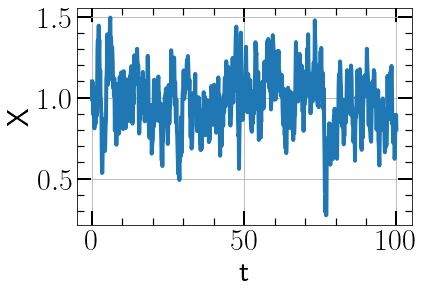

/tmp/ipykernel_131847/3824436177.py:33: RuntimeWarning: divide by zero encountered in double_scalars
  prefactor = 1 / np.sqrt(2 * np.pi * sigma0**2)
/tmp/ipykernel_131847/3824436177.py:35: RuntimeWarning: divide by zero encountered in double_scalars
  f =  prefactor * np.exp( -(x2 - x1 * np.exp(-mu*dt) - \
/tmp/ipykernel_131847/3824436177.py:35: RuntimeWarning: invalid value encountered in double_scalars
  f =  prefactor * np.exp( -(x2 - x1 * np.exp(-mu*dt) - \
/tmp/ipykernel_131847/3824436177.py:30: RuntimeWarning: invalid value encountered in double_scalars
  sigma0 = sigma**2 * (1 - np.exp(-2*mu*dt)) / (2 * mu)


Optimization terminated successfully
[0.97490756 1.5617896  0.32394711]


In [56]:
# Ornstein-Uhlenbeck Process
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
from scipy.optimize import minimize

np.random.seed(123)

theta = 1
mu = 1.5
sigma = 0.3

t = np.linspace(0, 100, 1001)
dt = t[1] - t[0]

X = np.zeros( t.shape )
X[0] = 1.1

for i in range( t.size-1 ):
    X[i+1] = X[i] + mu * (theta - X[i]) * dt + sigma * np.sqrt(dt) * np.random.normal()
    
plt.plot(t, X)
plt.grid(True)
plt.xlabel('t')
plt.ylabel('X')
plt.show()

#  Code our distribution function
def OU(x1, x2, dt, theta, mu, sigma):
    sigma0 = sigma**2 * (1 - np.exp(-2*mu*dt)) / (2 * mu)
    sigma0 = np.sqrt( sigma0 )
    
    prefactor = 1 / np.sqrt(2 * np.pi * sigma0**2)
    
    f =  prefactor * np.exp( -(x2 - x1 * np.exp(-mu*dt) - \
                    theta * (1-np.exp(-mu*dt)) )**2 / (2 * sigma0**2) )
    
    return f

#  Calculate the negative of the log likelihood
def log_likelihood_OU(p, X, dt):
    
    theta = p[0]
    mu = p[1]
    sigma = p[2]
    
    N = X.size
    
    f = np.zeros( (N-1, ) )
    
    for i in range( 1, N ):
        x2 = X[i]
        x1 = X[i-1]
        
        f[i-1] = OU(x1, x2, dt, theta, mu, sigma)
    
    ind = np.where(f == 0)
    ind = ind[0]
    if ind.size > 0:
        f[ind] = 10**-8
        
    f = np.log(f)
    f = np.sum(f)
        
    return -f

#  mu and sigma must be greater than zero.  We use these contraint functions with minimze
def constraint1( p ):
    return p[1]

def constraint2( p ):
    return p[2]

#  Add constraint function to a dictionary
cons = ( {'type':'ineq', 'fun': constraint1},
         {'type':'ineq', 'fun': constraint2} )

#  Initial guess for our parameters
p0 = [1, 1, 1]

#  Call minimize
res = minimize(log_likelihood_OU, p0, args = (X, dt), constraints=cons)
print(res.message)
print(res.x)

In [31]:
# minimize function
from scipy.optimize import minimize, rosen, rosen_der

fun = lambda x: (x[0] - 1)**2 + (x[1] - 2.5)**2
cons = ({'type': 'ineq', 'fun': lambda x:  x[0] - 2 * x[1] + 2},
        {'type': 'ineq', 'fun': lambda x: -x[0] - 2 * x[1] + 6},
        {'type': 'ineq', 'fun': lambda x: -x[0] + 2 * x[1] + 2})
bnds = ((0, None), (0, None))
res = minimize(fun, (2, 0), method='SLSQP', bounds=bnds, constraints=cons)
print(res.message)
print('x=', res.x)

Optimization terminated successfully
x= [1.4 1.7]


In [33]:
# root finding
from scipy import optimize

def f(x):
    return (x**3 - 1)  # only one real root at x = 1

def fprime(x):
    return 3*x**2

sol = optimize.root_scalar(f, x0=0.2, fprime=fprime, method='newton')
print(sol.root, sol.iterations)

1.0 11


In [35]:
# root finding of vector function
import numpy as np
from scipy import optimize

def fun(x):
    return [x[0]  + 0.5 * (x[0] - x[1])**3 - 1.0, 0.5 * (x[1] - x[0])**3 + x[1]]

def jac(x):
    return np.array([[1 + 1.5 * (x[0] - x[1])**2,
                      -1.5 * (x[0] - x[1])**2],
                     [-1.5 * (x[1] - x[0])**2,
                      1 + 1.5 * (x[1] - x[0])**2]])


sol = optimize.root(fun, [0, 0], jac=jac, method='hybr')
print(sol.x)

[0.8411639 0.1588361]


Residual: 5.78575e-06


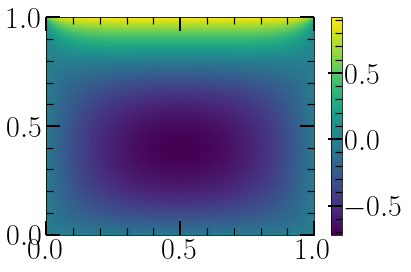

In [40]:
# root finding of integral-differential equation
import numpy as np
from scipy import optimize
import matplotlib.pyplot as plt

# parameters
nx, ny = 75, 75
hx, hy = 1./(nx-1), 1./(ny-1)

# bc
P_left, P_right = 0, 0
P_top, P_bottom = 1, 0

def residual(P):
    d2x = np.zeros_like(P)
    d2y = np.zeros_like(P)

    d2x[1:-1] = (P[2:]   - 2*P[1:-1] + P[:-2])/hx/hx
    d2x[0]    = (P[1]    - 2*P[0]    + P_left)/hx/hx
    d2x[-1]   = (P_right - 2*P[-1]   + P[-2])/hx/hx

    d2y[:,1:-1] = (P[:,2:] - 2*P[:,1:-1] + P[:,:-2])/hy/hy
    d2y[:,0]    = (P[:,1]  - 2*P[:,0]    + P_bottom)/hy/hy
    d2y[:,-1]   = (P_top   - 2*P[:,-1]   + P[:,-2])/hy/hy

    return d2x + d2y - 10*np.cosh(P).mean()**2

guess = np.zeros((nx, ny), float)
sol = optimize.root(residual, guess, method='krylov')
# print(sol.x)
print('Residual: %g' % abs(residual(sol.x)).max())

x, y = np.mgrid[0:1:(nx*1j), 0:1:(ny*1j)]
plt.pcolormesh(x, y, sol.x, shading='gouraud')
plt.colorbar()
plt.show()

In [ ]:
def inf_num_gen():
    num=0
    while True:
        yield num
        num+=1
    
def pow_gen(num):
    for i in inf_num_gen():
        yield num**i
        
gen = pow_gen(3)
for _ in range(4):
    result=next(gen)
print(result)